# **Behavioral Cloning**

**Behavioral Cloning Project**

The goals / steps of this project are the following:

* Use the simulator to collect data of good driving behavior
* Build, a convolution neural network in Keras that predicts steering angles from images
* Train and validate the model with a training and validation set
* Test that the model successfully drives around track one without leaving the road
* Summarize the results with a written report

## Rubric Points
### Here I will consider the [rubric points](https://review.udacity.com/#!/rubrics/432/view) individually and describe how I addressed each point in my implementation. 

---
### Files Submitted & Code Quality

#### 1. Submission includes all required files and can be used to run the simulator in autonomous mode

My project includes the following files:
* main,py containing the traning model script.
* model.py containing the script to create the model
* drive.py for driving the car in autonomous mode
* datafield.py for set up the Hyperparameter
* utils.py for the support function set
* model.h5 containing a trained convolution neural network
* P3report.ipynb summarizing the results, with ipynb can runing a part of the code

#### 2. Submission includes functional code
Using the Udacity provided simulator and my drive.py file, the car can be driven autonomously around the track by executing
```sh
python drive.py model.h5
```

#### 3. Submission code is usable and readable

The main.py file contains the code for training and saving the convolution neural network. The file shows the pipeline I used for training and validating the model, and it contains comments to explain how the code works.

### Model Architecture and Training Strategy

#### 1. An appropriate model architecture has been employed

I used [NVIDIA](http://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf) End to End module accroding my understanding. The model croped, resized and normalized the data at begining. and then have 5 convolutional neural networks with 5x5 and 3x3 filter, after the flatten lay and a dropout layer followed 5 fully connected layers.

#### 2. Attempts to reduce overfitting in the model

The model contains dropout layers in order to reduce overfitting (model.py lines 43).
The model was trained and validated on different data sets to ensure that the model was not overfitting (code line main.py 17-22).
And in the generator, each epoch create a set of random image for training, always be different can help the training out of overfit.  
The model was tested by running it through the simulator and ensuring that the vehicle could stay on the track.

#### 3. Model parameter tuning

all model parameter tuning are located in datafield.py. 

At begining I use a big set of data(20000+), then 3 epoch are enough to reach nearly overfiting. Afterwards I use a small random dataset(3000+), it always have potential to reduce the loss, so I take 10~20 epoch.

#### 4. Appropriate training data

I was tried to use my own data, which collecting by keyboard control method. The resluts are not good enough. So after it in this task, I use [Udacity data](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584f6edd_data/data.zip) 

### Architecture and Training Documentation

#### 1. Solution Design Approach

The overall strategy for deriving a model architecture was to use the Nivida end to end architecture.

My first step was to use a convolution neural network model similar to the Nivida's papier I thought this model might be appropriate because it was proved by others.

In order to gauge how well the model was working, I split my image and steering angle data into a training and validation set. I found that my first model had a low mean squared error on the training set but a high mean squared error on the validation set. This implied that the model was overfitting.

To combat the overfitting, I modified the model with drop out layer so that result seems better.

Then I try to do next step was to run the simulator to see how well the car was driving around track one. There were a few spots where the vehicle fell off the track. to improve the driving behavior in these cases, I used a lambda layer, which calling a resize and normalize function.

At the end of the process, the vehicle is able to drive autonomously around the track without leaving the road.

#### 2. Final Model Architecture

The final model architecture (model.py lines 14-50) consisted of a convolution neural network with the following layers and layer sizes. It is builded according nivida end2end Architecture.
```sh
    model.add(Cropping2D(cropping=((df.cropTop, df.cropBottom), (0, 0)), input_shape=df.ImgShape, name='input'))
    model.add(Lambda(resize))
    model.add(Lambda(normalize))
    # In: 64x64
    model.add(Conv2D(24,5,5,subsample=(2, 2),activation = 'elu') )
    model.add(Conv2D(36,5,5,subsample=(2, 2),activation = 'elu'))
    model.add(Conv2D(48,5,5,subsample=(2, 2),activation = 'elu'))
    model.add(Conv2D(64,3,3,activation = 'elu'))
    model.add(Conv2D(64,3,3,activation = 'elu'))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(1164))
    model.add(Dense(100))
    model.add(Dense(50))
    model.add(Dense(10))
    model.add(Dense(1))
```




[//]: # (Image References)

[image1]: ./pic/center.jpg "central lane image"
[image2]: ./pic/left.jpg "central lane image"
[image3]: ./pic/right.jpg "central lane image"

#### 3. Creation of the Training Set & Training Process

For the dataset, I used Udacity data as the bais.
this dataset contained a mount of steering Zero Frame. 
So in the getTrainDate function, I dropout a part of this kind Frame. 

[//]: # (Image References)

[image1]: ./pic/center.jpg "central lane image"
[image2]: ./pic/left.jpg "central lane image"
[image3]: ./pic/right.jpg "central lane image"

#### 3. Creation of the Training Set & Training Process

For the dataset, I used Udacity data as the bais.
this dataset contained a mount of steering Zero Frame. 
So in the getTrainDate function, I dropout a part of this kind Frame. 

and then to augment the data set, the following techincal are used:

   * Random camera choose, and adjust.
   * Random brightness 
   * Random translation 
   * Random flip

##### 1. Random camera choose, and adjust.

Here is an example image of center lane driving:

![center lane][image1]

I also used the vehicle recovering from the left side and right sides of the road. with these two different camera, I can have more data for model training.

![left][image2]
![right][image3]

There are  three image come from different camera, I randomly take one of it, if it from left will adjust with a positv offset. If from right, then give a negative offset(in this task I use 0.25).



##### 2. Random brightness 
to creating the rubstic and augment the dataset, a random brightness function are used here.

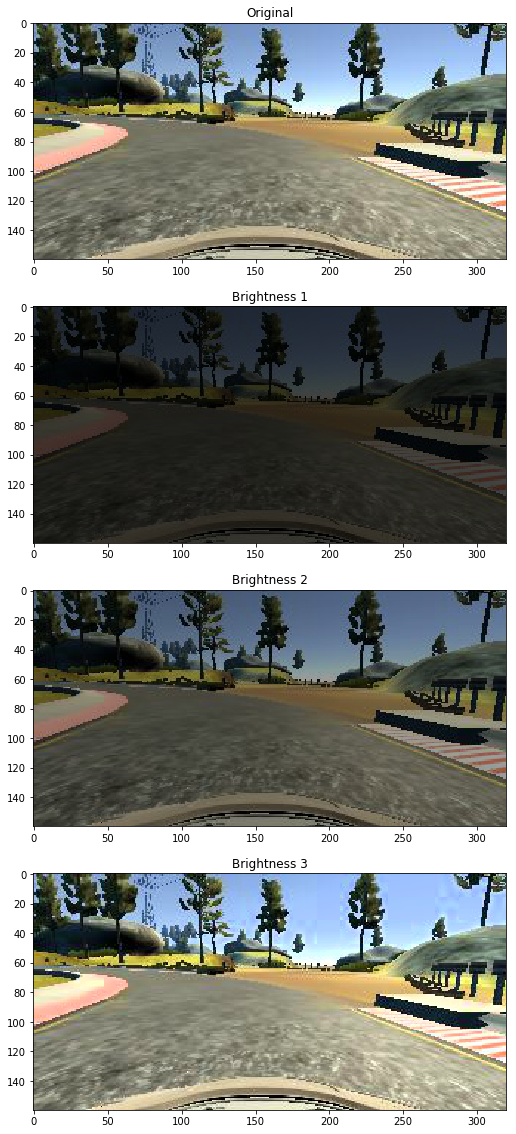

In [48]:
import numpy as np
import cv2
import utils
import datafield as df
import matplotlib.pyplot as plt

image = cv2.imread("./pic/center.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplots(figsize=(10, 20))
plt.subplot(4,1,1)
plt.imshow(image)
plt.title('Original')

for i in range(1, 4):
    plt.subplot(4,1,i+1)
    plt.imshow(utils.random_bright(image))
    plt.title('Brightness {}'.format(i))

plt.show()

##### 3. Random translation 
as a reference, I readed the [Blog](https://chatbotslife.com/using-augmentation-to-mimic-human-driving-496b569760a9#.1zm9bk6xi) of Yadav, I find the idea of translate could be useful, then I implement a simliar solution for this point, and cenificante improve the behavior of the driving.


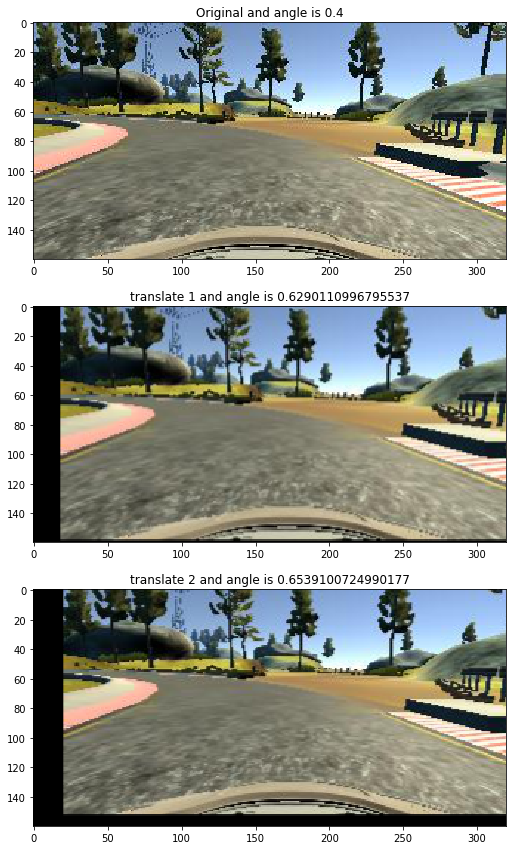

In [72]:
image = cv2.imread("./pic/center.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
angle =0.4

plt.subplots(figsize=(10, 20))
plt.subplot(4,1,1)
plt.imshow(image)
plt.title('Original and angle is {}'.format(angle))

for i in range(1, 3):
    plt.subplot(4,1,i+1)
    image_tr, angle_tr = utils.random_translate(image,angle)
    plt.imshow(image_tr)
    plt.title('translate {} and angle is {}'.format(i,angle_tr))
plt.show()

##### 4. Random flip

I also flipped images and angles thinking that this would increase the learning dataset.

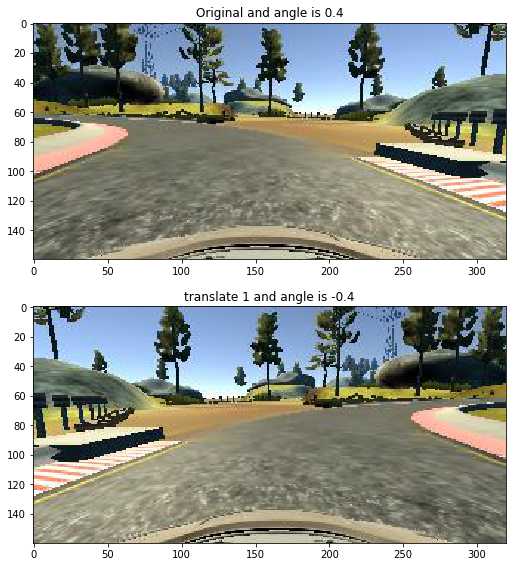

In [73]:
image = cv2.imread("./pic/center.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
angle =0.4

plt.subplots(figsize=(10, 20))
plt.subplot(4,1,1)
plt.imshow(image)
plt.title('Original and angle is {}'.format(angle))

for i in range(1, 2):
    plt.subplot(4,1,i+1)
    image_tr, angle_tr = utils.random_flip(image,angle)
    plt.imshow(image_tr)
    plt.title('translate {} and angle is {}'.format(i,angle_tr))
plt.show()

I finally randomly shuffled the data set.
for the validation set (20%) is already split at begining.
I used an adam optimizer so that manually training the learning rate wasn't necessary.